<a href="https://colab.research.google.com/github/Rikipratama/Exploratory-Data-Analysis-EDA-/blob/main/EDA_Game_Industry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Load Dataset

In [2]:
data = pd.read_excel("/content/Games Sales.xlsx")
print(data.head(5))

                            Name  Sales     Series    Release  \
0  PlayerUnknown's Battlegrounds   42.0        NaN 2017-01-12   
1                      Minecraft   33.0  Minecraft 2011-01-11   
2                     Diablo III   20.0     Diablo 2012-01-05   
3                    Garry's Mod   20.0        NaN 2006-01-11   
4                       Terraria   17.2        NaN 2011-01-05   

                 Genre               Developer               Publisher  
0        Battle royale            PUBG Studios                 Krafton  
1    Sandbox, survival          Mojang Studios          Mojang Studios  
2  Action role-playing  Blizzard Entertainment  Blizzard Entertainment  
3              Sandbox       Facepunch Studios                   Valve  
4     Action-adventure                Re-Logic                Re-Logic  


### Get Dimensions of DataFrame
In Python's pandas library, the shape attribute is used to get the dimensions of a DataFrame or a Series. It returns a tuple representing the number of rows followed by the number of columns in the DataFrame or Series.

In [3]:
data.shape

(175, 7)

### Summary Statistics in DataFrame
The **describe()** method in pandas DataFrame provides summary statistics of the numerical columns in the DataFrame. These statistics include count, mean, standard deviation, minimum, maximum, and quartiles. It helps in understanding the distribution and central tendency of the data.

In [4]:
data.describe()

,Sales
count,175.000000
mean,3.141143
std,4.960513
min,1.000000
25%,1.000000
50%,1.500000
75%,3.000000
max,42.000000


### Get a concise summary of DataFrame
In Python, specifically when working with the pandas library, the **info()** method is used to get a concise summary of a DataFrame. This method provides information about the DataFrame's structure, including the number of entries, column names, data types, and memory usage.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Name       175 non-null    object        
 1   Sales      175 non-null    float64       
 2   Series     139 non-null    object        
 3   Release    175 non-null    datetime64[ns]
 4   Genre      175 non-null    object        
 5   Developer  175 non-null    object        
 6   Publisher  175 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 9.7+ KB


### Converting Dtypes to Datetime
In Python, pd.datetime typically refers to the datetime class from the pandas library (pd is often used as an alias for pandas). The datetime class in pandas provides functionality to work with dates and times efficiently, including parsing strings into datetime objects, performing arithmetic operations on dates, and handling time zone conversions.

In [6]:
data['Release'] = pd.to_datetime(data["Release"])
print(data.head(3))

                            Name  Sales     Series    Release  \
0  PlayerUnknown's Battlegrounds   42.0        NaN 2017-01-12   
1                      Minecraft   33.0  Minecraft 2011-01-11   
2                     Diablo III   20.0     Diablo 2012-01-05   

                 Genre               Developer               Publisher  
0        Battle royale            PUBG Studios                 Krafton  
1    Sandbox, survival          Mojang Studios          Mojang Studios  
2  Action role-playing  Blizzard Entertainment  Blizzard Entertainment  


### Get the columns
In Python, when working with data frames or tables using libraries like pandas, you can use the columns attribute to get the column names of the dataset.

In [7]:
data.columns

Index(['Name', 'Sales', 'Series', 'Release', 'Genre', 'Developer',
       'Publisher'],
      dtype='object')

### Show the count of unique elements
The data.nunique() method in Python is used to count the number of unique elements in a pandas Series or DataFrame. It returns the count of unique elements along a specified axis.

In [8]:
data.nunique()

Name         175
Sales         30
Series        91
Release      130
Genre         61
Developer    109
Publisher     96
dtype: int64

### Count the number of Null

The data.isnull().sum() call is used to count the number of null values in each column of the data DataFrame.

In [9]:
data.isnull().sum()

Name          0
Sales         0
Series       36
Release       0
Genre         0
Developer     0
Publisher     0
dtype: int64

#### Checking persentase of null

In [10]:
(data.isnull().sum()/(len(data)))*100

Name          0.000000
Sales         0.000000
Series       20.571429
Release       0.000000
Genre         0.000000
Developer     0.000000
Publisher     0.000000
dtype: float64

### Handle Missing Values

In the dataset, we have missing values in column Series. The missing values is blank columns. So, we must to handle missing values. The method is to replace the blank column with **unknown**. because the data type in the series column is an object.

In [11]:
data.fillna(value="Unknown", inplace=True)
data.head()

,Name,Sales,Series,Release,Genre,Developer,Publisher
0,PlayerUnknown's Battlegrounds,42.0,Unknown,2017-01-12,Battle royale,PUBG Studios,Krafton
1,Minecraft,33.0,Minecraft,2011-01-11,"Sandbox, survival",Mojang Studios,Mojang Studios
2,Diablo III,20.0,Diablo,2012-01-05,Action role-playing,Blizzard Entertainment,Blizzard Entertainment
3,Garry's Mod,20.0,Unknown,2006-01-11,Sandbox,Facepunch Studios,Valve
4,Terraria,17.2,Unknown,2011-01-05,Action-adventure,Re-Logic,Re-Logic


In [12]:
data.isnull().sum()

Name         0
Sales        0
Series       0
Release      0
Genre        0
Developer    0
Publisher    0
dtype: int64

### Cheking Typo

In [13]:
for col_name in ['Name', 'Series', 'Genre', 'Developer',
       'Publisher']:
       print(data[col_name].value_counts(), '\n')

PlayerUnknown's Battlegrounds       1
Dungeon Siege                       1
Cuphead                             1
Danganronpa 2: Goodbye Despair      1
Danganronpa: Trigger Happy Havoc    1
                                   ..
Battlefield 1942                    1
Black & White                       1
Civilization III                    1
Cossacks II: Napoleonic Wars        1
Zoo Tycoon                          1
Name: Name, Length: 175, dtype: int64 

Unknown                  36
Command & Conquer         5
StarCraft                 4
Age of Empires            4
Civilization              4
                         ..
Pac-Man                   1
Alice                     1
Ark: Survival Evolved     1
BioShock                  1
Zoo Tycoon                1
Name: Series, Length: 92, dtype: int64 

Real-time strategy                        24
First-person shooter                      19
Action role-playing                       12
Construction and management simulation     9
Role-playing 

### Question to be Answered
1. Which game is oldest and the newest game in that dataset?

In [14]:
data['Release'] = pd.to_datetime(data['Release'])

# Sorting DataFrame by Release
data_sorted = data.sort_values(by='Release')

data_oldest = data_sorted.iloc[0]
data_newest = data_sorted.iloc[-1]
print("the oldest game", "\n", data_oldest, '\n')
print("the newest game", "\n", data_newest)

the oldest game 
 Name                                       Hydlide
Sales                                          1.0
Series                                     Hydlide
Release                        1984-01-12 00:00:00
Genre                          Action role-playing
Developer    Technology and Entertainment Software
Publisher    Technology and Entertainment Software
Name: 133, dtype: object 

the newest game 
 Name                         Valheim
Sales                            6.0
Series                       Unknown
Release          2021-01-02 00:00:00
Genre                       Survival
Developer                  Iron Gate
Publisher    Coffee Stain Publishing
Name: 20, dtype: object


The oldest game is **Hydlide**

![image.png](https://images.launchbox-app.com/644bc819-a1df-4c9d-b34a-40d1b5148ab6.png)

The newest games is **Valheim** ![image.png](https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fcdn.wccftech.com%2Fwp-content%2Fuploads%2F2021%2F02%2Fvalheim_longhouseHD-scaled.jpg&f=1&nofb=1&ipt=4570e6d071536476f759895edf8ffc12d835d3cd3c64db89ef0745976d0866e4&ipo=images)


### Question to be Answered

2.   Which publisher published most of the games?
3.   Which Developer developed most of the games?
4.   Which Series has the most sales?
5.   Which Series have the most games?



In [36]:
index_columns = ['Publisher', 'Developer', 'Series']
for top_values in index_columns:
    top_value = data[top_values].value_counts().idxmax()
    # Showing the values of columns
    if top_values == 'Publisher':
        print(f"Publisher has the most published is {top_value},\n")
    elif top_values == 'Developer':
        print(f"Developer has the most developed is {top_value}, \n")
    elif top_values == 'Series':
        data_filtered = data[data['Series'] != 'Unknown']
        top_value = data_filtered[top_values].value_counts().idxmax()
        print(f"Series has the most game is {top_value}, \n")
    else:
        print("")

# Filter out 'Unknown' values in the 'Series' column

# Grouping the filtered data by 'Series' and summing up the sales
series_sales = data_filtered.groupby('Series')['Sales'].sum()

# Finding the series with the highest total sales
top_selling_series = series_sales.idxmax()

# Displaying the result
print(f"Series have the most sales is {top_selling_series}")

Publisher has the most published is Electronic Arts,

Developer has the most developed is Blizzard Entertainment, 

Series has the most game is Command & Conquer, 

Series have the most sales is Minecraft


In [28]:
most_series_sales = data_filtered.value_counts().idxmax()
most_series

('7 Days to Die',
 2.0,
 '7 Days',
 Timestamp('2016-01-06 00:00:00'),
 'Survival horror',
 'The Fun Pimps',
 'The Fun Pimps')

### Visualisasi Data

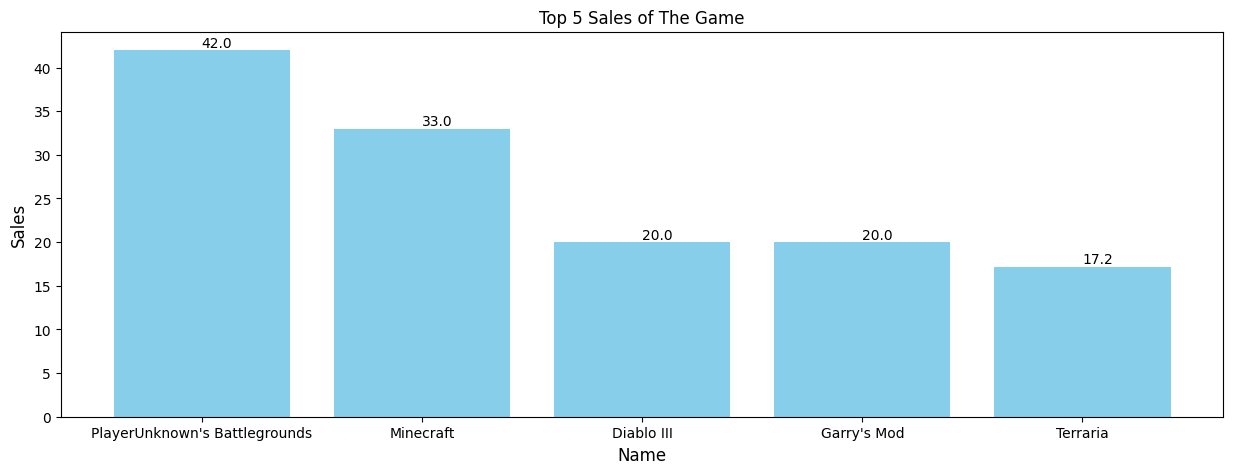

In [16]:
plt.figure(figsize=(15, 5))
bars = plt.bar(data['Name'][0:5], data['Sales'][0:5], color='skyblue')

# Adding label value on the bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')

# Adding label
plt.xlabel('Name', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.title('Top 5 Sales of The Game')

#Show the plot
plt.show()


In [17]:
# Groupby by columns ('Release') and then agg with sum
agg_daily = data.groupby('Release').agg({
    'Name': 'first',
    'Sales': 'sum'
}).reset_index()

print(agg_daily.head(5))

     Release                                    Name  Sales
0 1984-01-12                                 Hydlide    1.0
1 1985-01-06  Where in the World Is Carmen Sandiego?    4.0
2 1985-01-11                    International Karate    1.5
3 1988-01-01                                  Tetris    1.0
4 1988-01-08                            Last Ninja 2    5.5


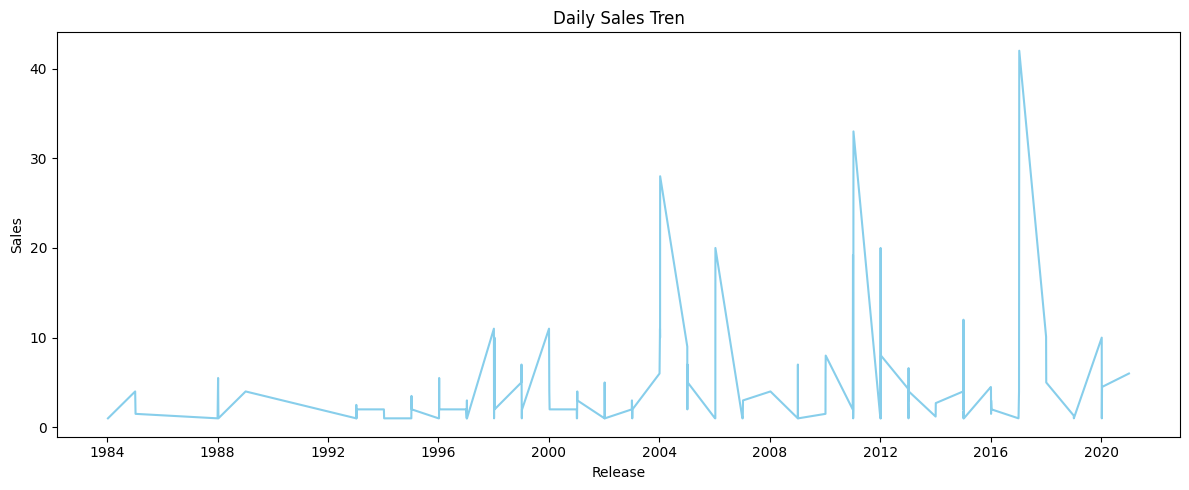

In [18]:
plt.figure(figsize=(12,5))
plt.plot('Release', 'Sales', data=agg_daily, color='skyblue')
plt.title('Daily Sales Tren')
plt.xlabel('Release')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()

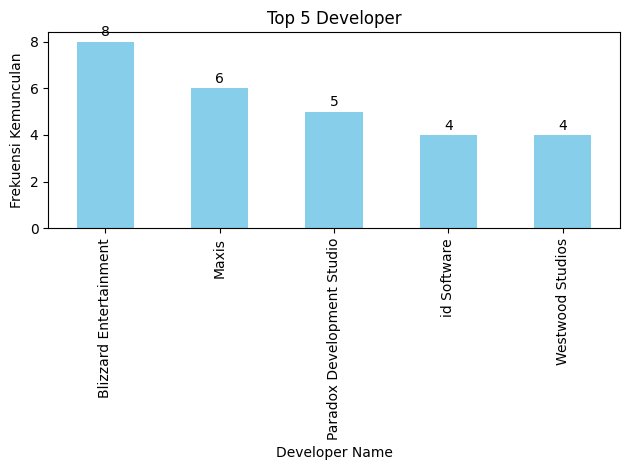

In [19]:
top_value_developer = data['Developer'].value_counts().head(5)
top_value_developer.plot(kind='bar', color='skyblue')
plt.xlabel('Developer Name')
plt.ylabel('Frekuensi Kemunculan')
plt.title('Top 5 Developer')
for i, j in enumerate(top_value_developer):
        plt.text(i, j + 0.1, str(j), ha='center', va='bottom')
plt.tight_layout()
plt.show()

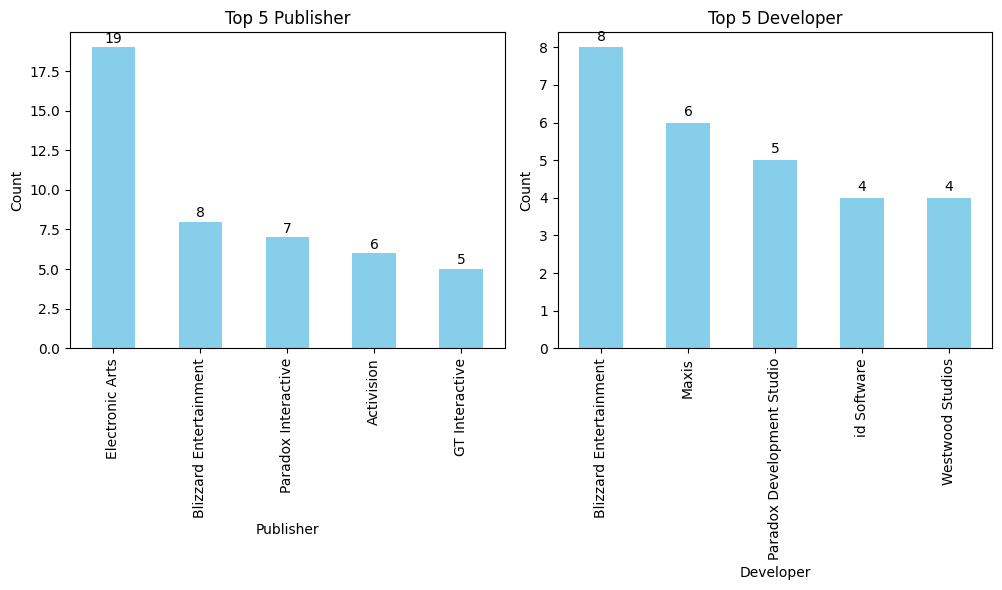

In [20]:
plt.figure(figsize=(15, 6))

for i, top_values in enumerate(index_columns):
    plt.subplot(1, 3, i + 1)
    top_values_counts = data[top_values].value_counts().head(5)
    top_values_counts.plot(kind='bar', color='skyblue')
    plt.title(f'Top 5 {top_values}')
    plt.xlabel(top_values)
    plt.ylabel('Count')
    for j, v in enumerate(top_values_counts):
        plt.text(j, v + 0.1, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()


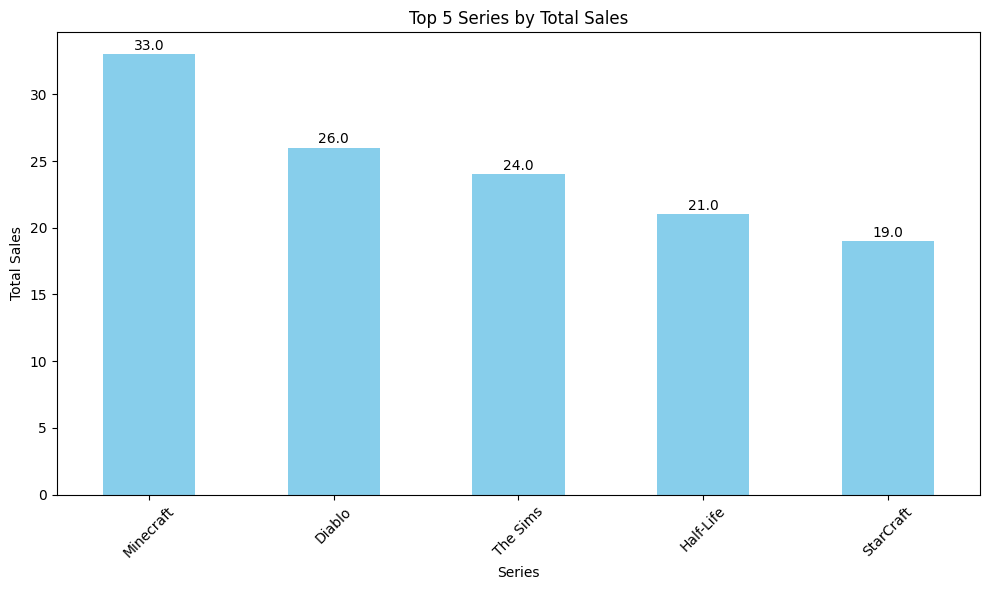

In [21]:
# Grouping the filtered data by 'Series' and summing up the sales
series_sales = data_filtered.groupby('Series')['Sales'].sum()

# Finding the top 5 series with the highest total sales
top_selling_series = series_sales.nlargest(5)

plt.figure(figsize=(10, 6))
top_selling_series.plot(kind='bar', color='skyblue')
plt.title('Top 5 Series by Total Sales')
plt.xlabel('Series')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)

for i, v in enumerate(top_selling_series):
    plt.text(i, v + 0.1, str(round(v, 2)), ha='center', va='bottom')

plt.tight_layout()
plt.show()
